In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
envName = 'Hopper-v1'
#make sure we adjust the environment name because we dont want to overwrite!!!
path = 'expert_pickles/'+envName+'.pickle'
file = open(path,'rb')
print("okay...")
traj = pickle.load(file)
print("starting")
episodes = []
states = []
actions = []
nextStates = []
rewards = []
terminals = []
qpos=[]
qvel=[]
rewardCounter = 0

lowerLim = 2400
upperLim = 3500
upperLim2 = upperLim
traj = traj[87000:1000000]+traj[6700000:6800000]
print("actually starting")
for step in traj:
    states.append(step[0])
    actions.append(step[1])
    reward = step[2]
    rewards.append(reward)
    nextStates.append(step[3])
    done = step[4]
    terminals.append(done)
    qpos.append(step[5])
    qvel.append(step[6])
    rewardCounter += reward
    if done:
        episode=[]
        episode.append(states)
        episode.append(actions)
        episode.append(rewards)
        episode.append(nextStates)
        episode.append(terminals)
        episode.append(qpos)
        episode.append(qvel)
        episode.append(rewardCounter)
        episodes.append(episode)
        
        #reset everything
        states = []
        actions = []
        nextStates = []
        rewards = []
        terminals = []
        qpos=[]
        qvel=[]
        rewardCounter = 0
    
episodes.sort(key=lambda x:x[7])

ep_list = list(zip(*episodes))[7]
#print(ep_list)
counter = 0
plt.hist(ep_list)
counter = 0 
good_indices = []
bad_indices = []

for index,ep in enumerate(ep_list):
    if ep > upperLim:
        good_indices.append(index)
    if ep < upperLim2 and ep > lowerLim:
        bad_indices.append(index)
print(len(good_indices))
print(len(bad_indices))   



good_actions = []
good_rewards = []
good_terminals = []
good_qpos = []
good_qvel = []
good_nextStates = []

mixed_actions = []
mixed_rewards = []
mixed_terminals = []
mixed_qpos = []
mixed_qvel = []
mixed_nextStates = []

bad_actions = []
bad_rewards = []
bad_terminals = []
bad_qpos = []
bad_qvel = []
bad_nextStates = []

broke = False
for index in reversed(good_indices):
    currentEp = episodes[index]
    good_actions = good_actions + currentEp[1]
    good_rewards = good_rewards + currentEp[2]
    good_nextStates = good_nextStates + currentEp[3]
    good_terminals = good_terminals + currentEp[4]
    good_qpos = good_qpos+currentEp[5]
    good_qvel = good_qvel+currentEp[6]
    
    if len(good_actions) >= 50000:
        print("'Good' thresh: Broken correctly")
        broke= True
        break
    if len(mixed_actions) >= 25000:
        pass
    else:
        mixed_actions = mixed_actions + currentEp[1]
        mixed_rewards = mixed_rewards + currentEp[2]
        mixed_nextStates = mixed_nextStates + currentEp[3]
        mixed_terminals = mixed_terminals + currentEp[4]
        mixed_qpos = mixed_qpos+currentEp[5]
        mixed_qvel = mixed_qvel+currentEp[6]
if broke == False:
    print("'Error: not enough data in range: change 'good' thresh")
                
broke = False     
for index in (bad_indices):
    currentEp = episodes[index]
    bad_actions = bad_actions + currentEp[1]
    bad_rewards = bad_rewards + currentEp[2]
    bad_nextStates = bad_nextStates + currentEp[3]
    bad_terminals = bad_terminals + currentEp[4]
    bad_qpos = bad_qpos+currentEp[5]
    bad_qvel = bad_qvel+currentEp[6]
    
    if len(bad_actions) >= 50000:
        print("'Bad' Thresh: Broken correctly")
        broke= True
        break
    if len(mixed_actions) >= 50000:
        pass
    else:
        mixed_actions = mixed_actions + currentEp[1]
        mixed_rewards = mixed_rewards + currentEp[2]
        mixed_nextStates = mixed_nextStates + currentEp[3]
        mixed_terminals = mixed_terminals + currentEp[4]
        mixed_qpos = mixed_qpos+currentEp[5]
        mixed_qvel = mixed_qvel+currentEp[6]
if broke == False:
    print("Error: not enough data in range: change 'bad' thresh")


good_actions=good_actions[:50000]
good_rewards=good_rewards[:50000]
good_nextStates=good_nextStates[:50000]
good_terminals=good_terminals[:50000]
good_qpos=good_qpos[:50000]
good_qvel=good_qvel[:50000]
good_terminals[-1]=1.0

mixed_actions=mixed_actions[:50000]
mixed_rewards=mixed_rewards[:50000]
mixed_nextStates=mixed_nextStates[:50000]
mixed_terminals=mixed_terminals[:50000]
mixed_qpos=mixed_qpos[:50000]
mixed_qvel=mixed_qvel[:50000]
mixed_terminals[-1]=1.0

bad_actions=bad_actions[:50000]
bad_rewards=bad_rewards[:50000]
bad_nextStates=bad_nextStates[:50000]
bad_terminals=bad_terminals[:50000]
bad_qpos=bad_qpos[:50000]
bad_qvel=bad_qvel[:50000]
bad_terminals[-1]=1.0

envName = 'expert_numpys/'+envName 
plt.hist(good_rewards)
plt.hist(mixed_rewards)
plt.hist(bad_rewards)
np.save(envName+'_good_actions.npy',np.asarray(good_actions))
np.save(envName+'_good_rewards.npy',np.asarray(good_rewards))
np.save(envName+'_good_nextStates.npy',np.asarray(good_nextStates).squeeze(1))
np.save(envName+'_good_terminals.npy',np.asarray(good_terminals))
np.save(envName+'_good_qpos.npy',np.asarray(good_qpos))
np.save(envName+'_good_qvel.npy',np.asarray(good_qvel))

np.save(envName+'_bad_actions.npy',np.asarray(bad_actions))
np.save(envName+'_bad_rewards.npy',np.asarray(bad_rewards))
np.save(envName+'_bad_nextStates.npy',np.asarray(bad_nextStates).squeeze(1))
np.save(envName+'_bad_terminals.npy',np.asarray(bad_terminals))
np.save(envName+'_bad_qpos.npy',np.asarray(bad_qpos))
np.save(envName+'_bad_qvel.npy',np.asarray(bad_qvel))

np.save(envName+'_mixed_actions.npy',np.asarray(mixed_actions))
np.save(envName+'_mixed_rewards.npy',np.asarray(mixed_rewards))
np.save(envName+'_mixed_nextStates.npy',np.asarray(mixed_nextStates).squeeze(1))
np.save(envName+'_mixed_terminals.npy',np.asarray(mixed_terminals))
np.save(envName+'_mixed_qpos.npy',np.asarray(mixed_qpos))
np.save(envName+'_mixed_qvel.npy',np.asarray(mixed_qvel))










    

okay...
starting
actually starting
81
603
'Good' thresh: Broken correctly
'Bad' Thresh: Broken correctly


(array([ 1.,  0.,  0.,  0.,  0.,  0., 27.,  0.,  0., 26.]),
 array([ 549.21780787,  857.60966782, 1166.00152778, 1474.39338773,
        1782.78524768, 2091.17710763, 2399.56896759, 2707.96082754,
        3016.35268749, 3324.74454744, 3633.1364074 ]),
 <a list of 10 Patch objects>)

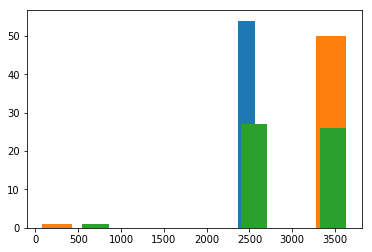

In [2]:
total_bad = []
total_good = []
total_mixed = []
bad_reward = 0
good_reward = 0
mixed_reward = 0
for i in range(50000):
    done = good_terminals[i]
    reward =good_rewards[i]
    good_reward+=reward
    if done:
        total_good.append(good_reward)
        good_reward = 0
        
    done = bad_terminals[i]
    reward =bad_rewards[i]
    bad_reward+=reward
    if done:
        total_bad.append(bad_reward)
        bad_reward = 0
        
    done = mixed_terminals[i]
    reward =mixed_rewards[i]
    mixed_reward+=reward
    if done:
        total_mixed.append(mixed_reward)
        mixed_reward = 0
plt.hist(total_bad)
plt.hist(total_good)
plt.hist(total_mixed)


In [3]:
sentiment = '_mixed'
actions = np.load(envName+sentiment+'_actions.npy')
states = np.load(envName+sentiment+'_nextStates.npy')
rewards = np.load(envName+sentiment+'_rewards.npy')
qpos = np.load(envName+sentiment+'_qpos.npy')
qvel = np.load(envName+sentiment+'_qvel.npy')
terminals = np.load(envName+sentiment+'_terminals.npy')
print(actions.shape)
print(states.shape)
print(rewards.shape)
print(qpos.shape)
print(qvel.shape)
print(terminals.shape)

(50000, 3)
(50000, 11)
(50000,)
(50000, 6)
(50000, 6)
(50000,)
